## Sales Conversion Optimization - Facebook ad campaigns analysis

#### Business Problem:
Imagine you are working with XYZ Company, a company that runs social media ad campaigns on Facebook. The goal of the company is to optimize sales conversions from these ad campaigns and predict future sales accurately. The challenge they face is understanding which factors influence ad conversions and how to allocate their advertising budget effectively to maximize conversions.



**Business Story:**

XYZ Company, a forward-thinking enterprise, has made substantial investments in social media advertising, with a primary focus on Facebook, to promote its diverse range of products. Over time, they've accumulated a wealth of data from numerous ad campaigns. This data includes information on user demographics, interests, ad impressions, clicks, and the expenditures associated with each campaign. The ultimate objective is to boost conversions, which could take the form of inquiries about their products or actual purchases.

When it comes to analyzing the Facebook advertising dataset, it's crucial to direct our efforts toward generating actionable insights that can have a direct impact on business performance. The precise nature of these insights, however, hinges on understanding the unique marketing strategies and campaign objectives of XYZ Company. Different companies may prioritize different key performance indicators (KPIs) based on their specific goals:

1. **Brand Awareness Focus**: For a new company aiming to build brand recognition, the emphasis might be on maximizing ad impressions. In this case, the primary concern is achieving wide visibility and exposure. The performance of these ads in generating clicks or revenue may be secondary.

2. **Revenue Maximization and Cost Efficiency**: Another company might be more inclined to maximize revenue while minimizing advertising expenses. For such businesses, every dollar spent on advertising needs to translate into a substantial return on investment. Therefore, KPIs such as conversion rates, cost per acquisition, and revenue generated per ad campaign become paramount.

Given these divergent objectives, it's critical to collaborate closely with the client to understand their precise aspirations for their marketing campaigns. This ensures that the conclusions drawn from the data analysis are not only insightful but, more importantly, actionable. After all, the purpose of conducting this analysis is to drive improvements and strategic decisions that align with the company's goals. There is little value in producing a report filled with insights if those insights don't align with the client's objectives or if they cannot be used to inform concrete actions.

By aligning data analysis with the specific goals of XYZ Company, we can ensure that the insights generated will guide strategic decisions and contribute to improved business performance, whether that involves maximizing brand exposure, optimizing ad performance, or increasing revenue while managing advertising costs effectively.

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("KAG_conversion_data.csv")

In [2]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


checking for null values

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


#### Understanding Ad Campaign Effectiveness: 
Our first task is to analyze the historical data to understand which ad campaigns have been more successful in terms of conversions. We can identify key metrics that correlate with high conversion rates.

In [4]:
df.shape

(1143, 11)

In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


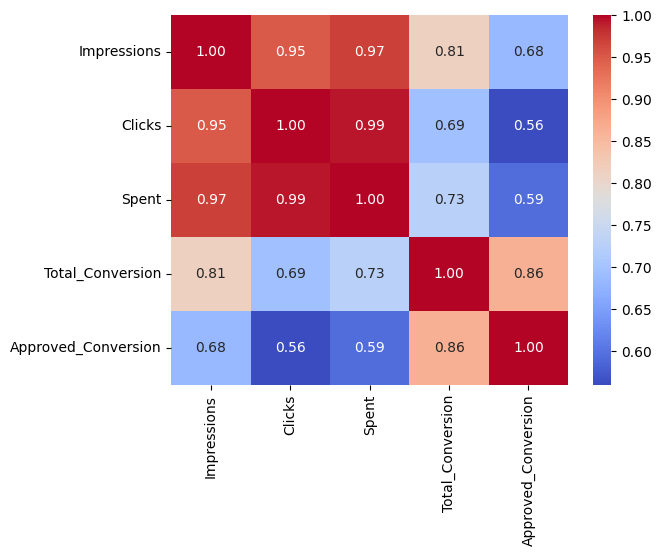

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

The heatmap reveals the following insights:

* Impressions and Approved Conversions: There is a notable positive correlation between "Impressions" and "Approved_Conversion." This means that as the number of times the ad is shown (Impressions) increases, there is a higher likelihood of more people actually making a purchase (Approved_Conversion). This suggests that increasing ad visibility can lead to higher sales.

* Total Conversion and Approved Conversions: Similar to Impressions, "Total_Conversion" also shows a positive correlation with "Approved_Conversion." This implies that when more people inquire about the product (Total_Conversion), it tends to result in more actual purchases (Approved_Conversion). This relationship is important because it indicates that inquiries can lead to sales.

On the other hand, we observe that "Clicks" and "Spent" have weaker correlations with "Approved_Conversion." While they are still relevant metrics, the strength of their relationship with the ultimate goal of driving sales is not as pronounced as the relationship between Impressions, Total Conversion, and Approved Conversion.

This information is valuable for XYZ Company's marketing strategy. It suggests that to optimize their ad campaigns for better sales conversions, they should focus on increasing Impressions and encouraging user inquiries (Total_Conversion) about the product. These strategies have a more significant impact on driving actual product purchases (Approved_Conversion). Additionally, XYZ Company may want to evaluate their spending (Spent) and click-through rates (Clicks) to ensure they are cost-effective in achieving their ultimate goal of increasing sales.

In [7]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

In [8]:
df["xyz_campaign_id"].replace({916:"campaign_1",936:"campaign_2",1178:"campaign_3"}, inplace=True)

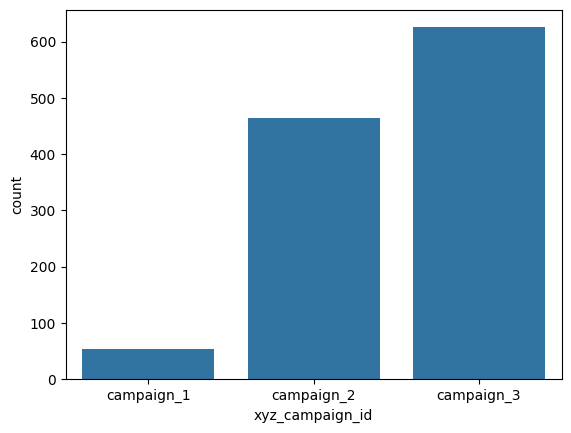

In [9]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.show() 

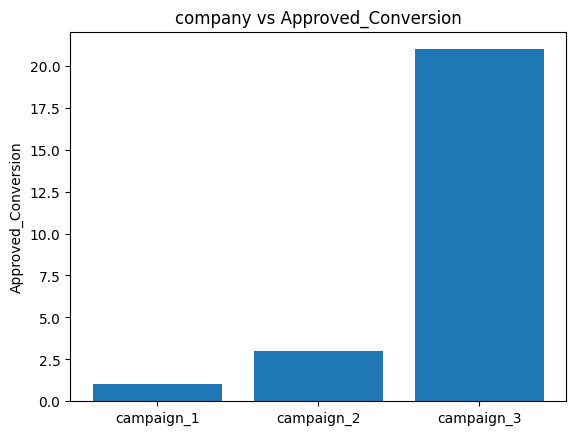

In [10]:
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

As depicted in the bar chart, the y-axis is labeled "Approved_Conversion," representing the count of product purchases, while the x-axis displays the different "xyz_campaign_id." Each bar corresponds to a specific campaign and indicates the volume of Approved_Conversions attributed to that campaign.

From the chart, it becomes evident that "campaign_3" surpasses the other campaigns in terms of Approved_Conversions. In essence, it has achieved a higher number of successful product purchases compared to the other campaigns. This suggests that "campaign_3" has been particularly effective in motivating potential customers to make actual purchases.

This insight is of utmost importance for XYZ Company, as it underscores the outstanding performance of "campaign_3" in driving product sales. It implies that the strategies, messaging, or targeting methods employed in "campaign_3" have strongly resonated with the audience, resulting in a higher conversion rate.

This observation has valuable implications for XYZ Company's marketing strategy. They may consider allocating more resources or applying the successful tactics from "campaign_3" to improve the performance of their other campaigns. It underscores the significance of data-driven decision-making in optimizing advertising efforts and achieving superior sales conversion rates.



##### We can extract valuable insights from the age-related data as well.

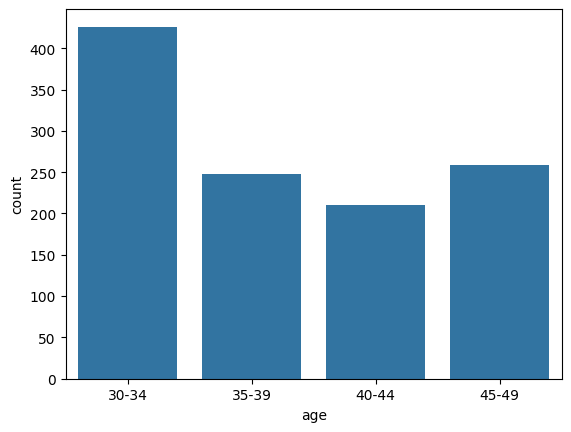

In [11]:
sns.countplot(x ='age', data = df) 
plt.show() 

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

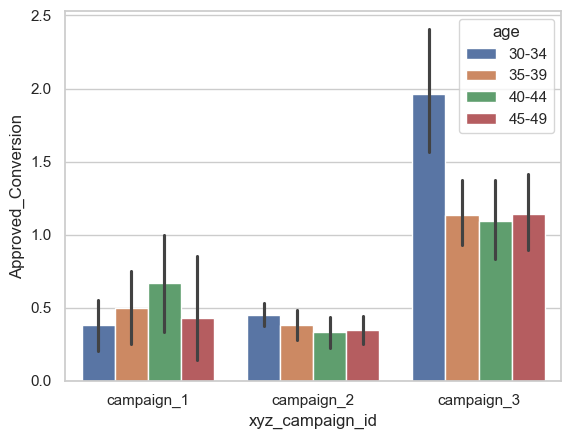

In [12]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

When we delve into the details of campaign_2 and campaign_3, it becomes evident that the age group of 30-34 exhibits a higher level of engagement and interest. Conversely, in the case of campaign_1, it's the age group of 40-44 that displays a notably higher level of interest. This distinction in age group preferences among the campaigns underscores the significance of tailoring marketing strategies to specific demographics for optimal results.

##### We can extract valuable insights from the gender-related data as well.

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

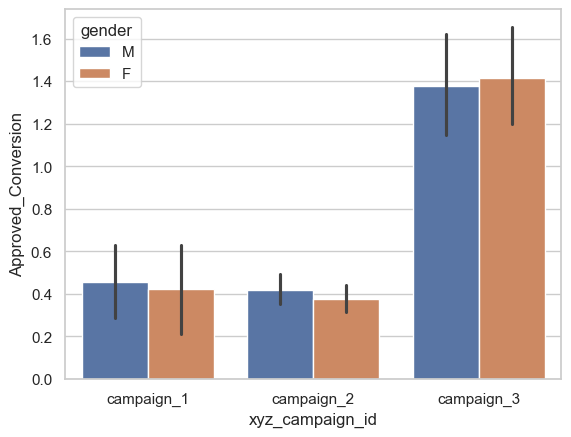

In [13]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=tips)

Regardless of the specific campaign (campaign_1, campaign_2, or campaign_3), both genders, that is, both males and females, exhibit similar levels of interest. In other words, the ad campaigns appear to resonate equally with both genders, showcasing a consistent pattern of engagement and interest across the board. This consistency suggests that the campaigns are effectively capturing the attention and interest of a diverse audience, transcending gender-based differences in response.

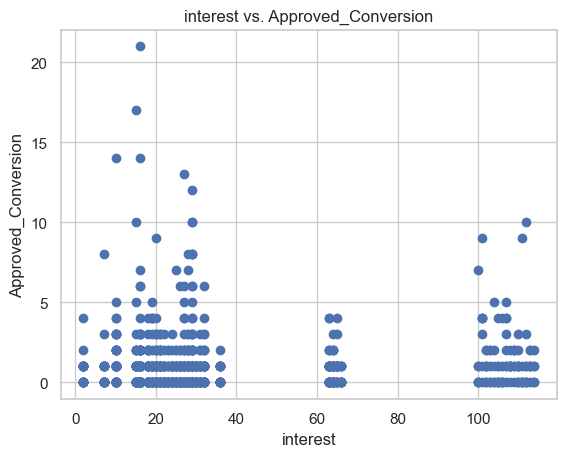

In [14]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

The scatter plot, which visualizes the relationship between "interest" and "Approved_Conversion," offers some intriguing insights. The "interest" variable represents a code that specifies the category to which a person's interest belongs, with these categories being derived from the individual's Facebook public profile.. The scatter plot highlights a unique pattern where increased interest, especially beyond the 100 mark, corresponds to a noteworthy spike in Approved_Conversions. This discovery emphasizes the importance of thoroughly analyzing data to uncover opportunities for enhancing marketing campaigns.

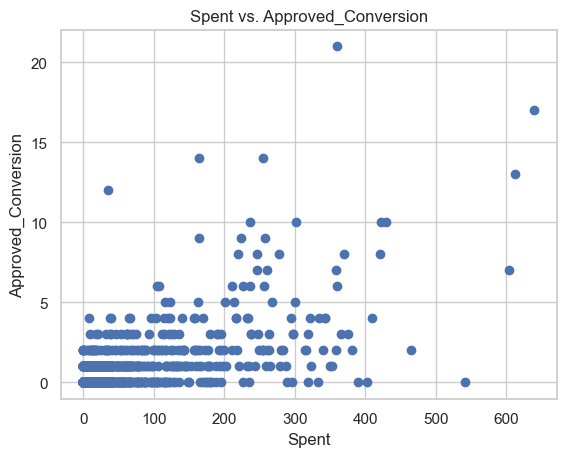

In [15]:
plt.scatter(df["Spent"], df["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

The "Spent" variable in the dataset represents the amount of money that company XYZ paid to Facebook for running its advertising campaign. Essentially, it reflects the financial investment made by the company to display its ads to the target audience on the Facebook platform.

When we analyze the relationship between the amount spent ("Spent") and the number of products bought ("Approved_Conversion"), an interesting pattern emerges. As the company increases its advertising expenditure, there is a corresponding increase in the number of products purchased by customers.

This observation suggests a positive correlation between the money spent on advertising and the actual conversions or product purchases. In other words, the more financial resources company XYZ allocates to their advertising campaigns, the more successful they are in driving customers to purchase their products.

This finding has significant implications for the company's marketing strategy. It indicates that a higher advertising budget can lead to more substantial returns in terms of product sales. It's a testament to the effectiveness of their advertising efforts in converting ad impressions into actual purchases. This insight can guide the company in making informed decisions about allocating their marketing budget to maximize the impact on sales conversions.

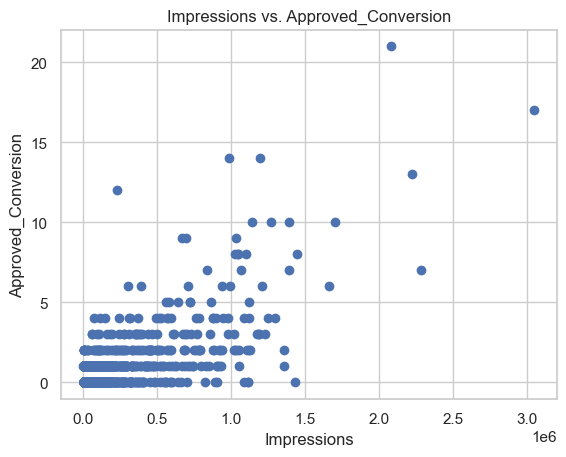

In [16]:
plt.scatter(df["Impressions"], df["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.show()

"Impressions" represent the number of times an ad was displayed to users, and "Approved_Conversion" indicates the number of individuals who actually made a purchase after seeing the ad.

Upon close examination of the data, it becomes evident that there is a noticeable inflection point or threshold in the "Impressions" variable. Below this point, the increase in impressions tends to have a relatively moderate impact on the number of approved conversions. However, beyond this critical threshold, there is a remarkable and sudden rise in approved conversions.

In other words, when the ad reaches a certain level of exposure, indicated by the "Impressions," there is a substantial and abrupt increase in the number of users who not only express interest but also proceed to make a purchase. This phenomenon suggests that there might be an optimal point of ad visibility where it starts significantly influencing customers' decisions to buy the product.

This observation has significant implications for the marketing strategy of company XYZ. It underscores the importance of achieving a certain critical mass of ad impressions to trigger a surge in conversions. Instead of merely focusing on the quantity of ad views, the company may benefit from concentrating their efforts on reaching this specific impression threshold, as it appears to be a turning point for driving actual product sales.

### Now, let's examine individuals who transitioned from clicking on the ad to making a purchase of the product.

/Users/binduraghunaga/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


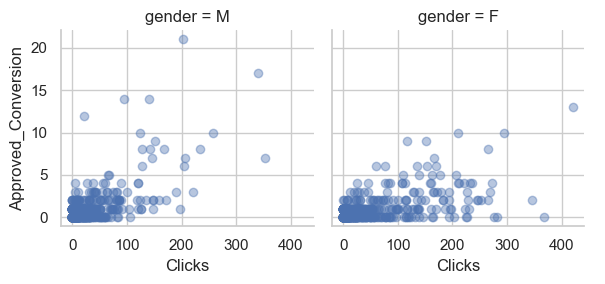

In [17]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

Examining these scatter plots, a noteworthy observation emerges. It appears that men tend to click on the ads more frequently than women, which is indicated by a higher concentration of data points in the scatter plot for the "men" category. This suggests that men are more inclined to engage with the ads and click on them.

However, the intriguing part of this analysis is the insight gained from the "Approved_Conversion" variable. Despite men clicking on the ads more often, it's women who exhibit a higher number of product purchases ("Approved_Conversion") after clicking on the ads. In other words, women, after engaging with the ad by clicking, tend to proceed to buy the advertised product more frequently than men.

This observation highlights a gender-based difference in the behavior of ad interaction. While men may click on the ads more, it's women who demonstrate a higher tendency to follow through with a purchase. This insight could have important implications for marketing strategies, suggesting that tailoring ad content or targeting specific products toward women might lead to a more efficient conversion rate.



/Users/binduraghunaga/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


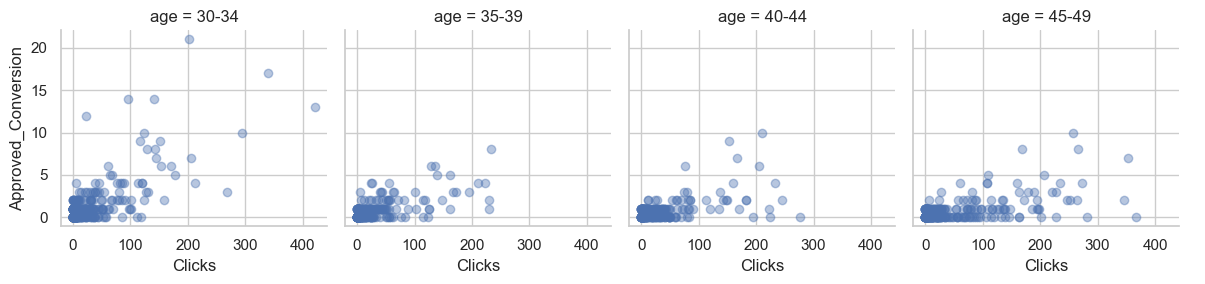

In [19]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();


This insight implies that individuals between the ages of 30 and 34 are particularly receptive to ad content and are more likely to follow through with a purchase after clicking on the ad. This information is valuable for marketing strategies, as it indicates a specific age demographic that is more inclined to convert from ad engagement to actual product acquisition.

#### Now, let's explore those individuals who progressed from showing interest to making a purchase.

/Users/binduraghunaga/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


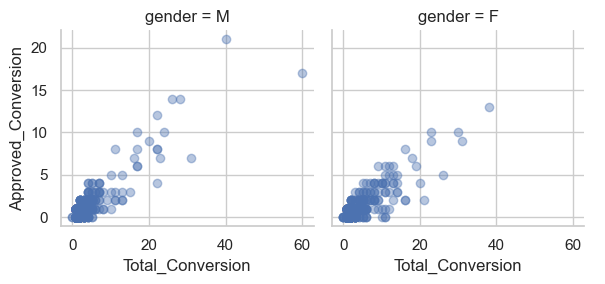

In [20]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

These scatter plots aim to visually represent the relationship between two crucial variables: "Total_Conversion" and "Approved_Conversion."

In these scatter plots, each data point signifies an individual, and its placement on the plot is determined by two key factors: the number of individuals who inquired about the product after seeing the ad ("Total_Conversion") and the number of individuals who proceeded to purchase the product ("Approved_Conversion"). The level of transparency applied to the data points ensures that overlapping points are clearly visible.

Upon reviewing these scatter plots, an interesting observation becomes evident. It appears that women tend to buy more products than men after inquiring about the product, which is evident from the concentration of data points in the scatter plot for the "women" category. This suggests that women are more likely to transition from an inquiry to an actual purchase.

However, it's equally noteworthy that men exhibit a higher tendency to inquire about the product in the first place, as indicated by the greater density of data points in the scatter plot for the "men" category. This suggests that men are more likely to initiate the process by showing interest in the product through inquiries.

This insight underscores a gender-based difference in the behavior of ad engagement. While men are more inclined to initiate inquiries, it's women who exhibit a higher tendency to proceed with a purchase after inquiring. This nuanced observation could have significant implications for marketing strategies, suggesting that tailoring ad content or targeted promotions to each gender may optimize the conversion process.

/Users/binduraghunaga/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


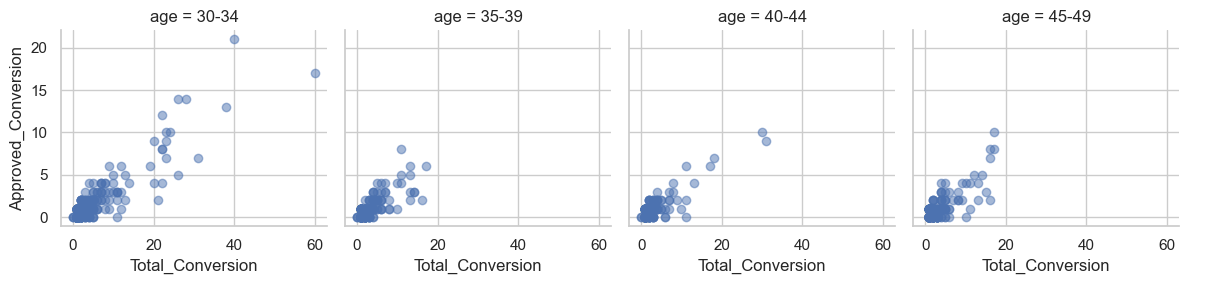

In [21]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend()

It becomes evident that individuals in the age group of 30-34 exhibit a notably higher likelihood of purchasing the product after making inquiries. This observation is underlined by the pronounced concentration of data points in the scatter plots corresponding to this age bracket. Consequently, it appears that individuals between the ages of 30 and 34 are more inclined to convert their initial interest into a product purchase.

### Summary
In conclusion, the analysis of this social media ad campaign data has unveiled several significant correlations and insights that hold immense value for our business strategies. Here's a summary of the key findings:

**Correlations:** 
- The variables "Impressions" and "Total_Conversion" exhibit a stronger correlation with "Approved_Conversion" compared to "Clicks" and "Spent." This underscores the importance of impressions and total conversion in driving approved conversions.

**Campaign_3:** 
- Campaign_3 emerges as the dominant campaign with the highest number of ads. Furthermore, this campaign stands out with a remarkable Approved_Conversion count, indicating that a substantial number of individuals made product purchases through this campaign.

**Age Groups:** 
- Campaign-specific nuances in audience preferences are evident. In campaign_3 and campaign_2, individuals aged 30-34 demonstrate higher levels of interest. In contrast, campaign_1 captures the attention of the 40-44 age group, signifying the need for targeted messaging.

**Gender:** 
- Across all three campaigns, both genders exhibit similar interests, suggesting that the ad content and approach resonate effectively with a diverse audience.

**Interest:** 
- Notably, there is a spike in users who purchase products after an "interest" score of 100, defying the anticipated distribution. This intriguing observation prompts further exploration of the factors contributing to conversions in this segment.

**Money Spent:** 
- The data demonstrates a positive relationship between the amount spent on ads and the number of products bought. This reaffirms the effectiveness of investment in advertising for driving conversions.

**Impressions:** 
- A notable surge in Approved_Conversions occurs after a specific point in the number of impressions, indicating a critical threshold for maximizing conversions.

**Product Bought After Clicking the Ad:** 
- Men tend to click on ads more frequently, but women outperform in terms of product purchases after clicking the ad. This highlights the gender-specific conversion dynamics that should be considered in campaign design.

**Age Group Impact on Product Purchase After Click:** 
- The 30-34 age group exhibits a higher tendency to make purchases after clicking on an ad. Tailoring campaigns to this age bracket may yield better results.

**Product Bought After Enquiring the Ad:** 
- Women lead in terms of product purchases following inquiries. However, men tend to inquire more frequently, emphasizing the potential for targeted follow-up strategies.

**Age-Specific Trends in Product Purchase After Inquiry:** 
- Individuals aged 30-34 stand out as more likely to buy the product after inquiring, emphasizing the value of age-specific targeting in ad campaigns.

These insights provide a roadmap for optimizing our marketing efforts. Leveraging the identified correlations and campaign-specific trends, we can refine ad content, budget allocation, and audience targeting to enhance conversion rates. Understanding the nuances of gender and age-specific behaviors after ad interactions equips us with the knowledge to craft more effective and tailored advertising campaigns. This data-driven approach positions us for greater success and improved ROI in our future marketing endeavors.

### Lets model the data to predict sales conversion

In [23]:
df["xyz_campaign_id"].replace({"campaign_1":916 ,"campaign_2":936 ,"campaign_3":1178}, inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df["gender"])
df["gender"]=encoder.transform(df["gender"])
print(df["gender"])

0       1
1       1
2       1
3       1
4       1
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: gender, Length: 1143, dtype: int64


In [25]:
encoder.fit(df["age"])
df["age"]=encoder.transform(df["age"])
print(df["age"])

0       0
1       0
2       0
3       0
4       0
       ..
1138    3
1139    3
1140    3
1141    3
1142    3
Name: age, Length: 1143, dtype: int64


In [26]:
x=np.array(df.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(df["Total_Conversion"])

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y=y.reshape(len(y),1)
sc_x= StandardScaler()
x = sc_x.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(x_train, y_train)
y_pred=rfr.predict(x_test)
y_pred=np.round(y_pred)

/Users/binduraghunaga/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [30]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mean_absolute_error=mean_absolute_error(y_test, y_pred)
mean_squared_error=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error)
r2_score=r2_score(y_test, y_pred)

In [32]:
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score)

Mean Absolute Error: 0.9912663755458515
Mean Squared Error: 4.6593886462882095
Root Mean Squared Error: 2.158561707778633
R2 Score: 0.7530816415210646


In this analysis, we employed a Random Forest Regressor to predict the "Total_Conversion." The resulting R-squared value is 0.753, which indicates that approximately 75.3% of the data points align with the regression model.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")


Mean Squared Error (MSE): 3.4059682470681167
Mean Absolute Error (MAE): 1.044108941060463
R-squared (R^2): 0.819505056898957


In this analysis, we utilized Linear Regression to predict the 'Total_Conversion.' The R-squared value obtained from the model is 0.8195, signifying that approximately 81.95% of the data points are explained by the linear regression model. The Mean Squared Error (MSE) and Mean Absolute Error (MAE) are 3.406 and 1.044, respectively, which provide measures of the prediction errors. These results indicate that the linear regression model is effective in explaining the variance in 'Total_Conversion' and making accurate predictions, as evidenced by the high R-squared value and relatively low MSE and MAE.

#### Business Insights:

1) Maximizing Conversion Rates in Social Ad Campaigns

To optimize social ad campaigns for the highest conversion rates, we can draw valuable insights from our analysis. Campaign_3 outperforms the others with the highest conversion rate, indicating that it's worth investigating the factors contributing to this success.

- **Ad Count**: Increasing the number of ad placements can lead to better reach and higher conversion rates.
- **Targeted Age Group**: Focusing on the age group of 30-34 appears to be a key demographic for achieving successful conversions.
- **Interest Types**: Prioritizing users with interest codes beyond 100 can improve conversion rates, especially considering the notable uptick in conversions for this group.
- **Impressions**: The number of times an ad is displayed ("impressions") is positively correlated with approved conversions, emphasizing the importance of enhancing impressions for improved conversion performance.

2) Target Demographics with High Clickthrough Rates

Understanding the demographics with the best clickthrough rates is essential for effective targeting:

- **Gender**: Women tend to exhibit a higher tendency to purchase after clicking an ad compared to men. Therefore, tailoring campaigns to female audiences may yield higher clickthrough rates.
- **Age Group**: Age group 30-34 shows a significant propensity to buy the product after clicking the ad, making it a prime demographic for targeting.

3) Decision-Making Time per Age Group

Analyzing the time it takes for different age groups to make a decision and convert can provide insights for retargeting strategies:

- **Quick Decisions**: Age groups 30-34 and 35-39 tend to make faster decisions, making them prime candidates for campaigns with shorter turnaround times.
- **Longer Decision Period**: Age group 45-49 takes more time to decide. Tailoring campaigns with extended decision-making windows can be effective for this demographic.

4) Evaluating Campaign Performance

To optimize future campaigns, comparing individual campaign performance is crucial:

- **Campaign_3**: This campaign emerges as the clear winner due to its exceptional approved conversion rate, making it a strong candidate for replication.
- **Campaign_1**: Despite having fewer ads, campaign_1 performs well and may be a valuable choice for running similar campaigns.
- **Campaign_2**: Campaign_2, which features a larger number of ads, underperforms compared to campaign_1, indicating room for improvement or potential adjustments in future endeavors.

These insights derived from our data analysis provide actionable strategies for enhancing social ad campaigns, tailoring targeting demographics, optimizing turnaround times, and selecting the most effective campaign designs. By implementing these findings, businesses can drive improved conversion rates, thereby achieving better results in their social media advertising efforts.


####  Other points to consider:
* Expanding on ROI:
While ROAS reports on campaigns tactically, ROI analysis offers a strategic view. To calculate ROI effectively, integrating data from additional sources, such as website analytics, is crucial. This allows us to understand how visitors from our Facebook ad campaigns interact with our website and uncover other conversion events.
1. Assisted Conversions: Visitors may engage with our website through various touchpoints. Some may subscribe to our email newsletter, browse extensively, or return later to make a purchase. These conversions may not be attributed to a single campaign but can be visible as 'assisted conversions' in tools like Google Analytics.
2. Remarketing/Retargeting: Leveraging the data, we can also implement retargeting campaigns to re-engage with visitors and nurture leads over time.

* Considering Lifetime Customer Value: ROI calculations can extend to evaluating the lifetime value of customers. A single purchase may lead to multiple future transactions over weeks, months, or years. Understanding how customers' spending behavior evolves over time can alter the perception of the initial cost-per-click.
By assigning values to various website goals, tracking visitor sources, and analyzing long-term interactions, we can make well-informed judgments and decisions about the performance of marketing campaigns.

* Aligning with Clear Objectives: By aligning with specific business objectives and understanding the model, data analysis leads to informed decisions and ongoing marketing optimization.